# Rental Listing Inquiries数据探索

数据说明：
Rental Listing Inquiries数据集是Kaggle平台上的一个分类竞赛任务，需要根据公寓的特征来预测其受欢迎程度（用户感兴趣程度分为高、中、低三类）。其中房屋的特征x共有14维，响应值y为用户对该公寓的感兴趣程度。评价标准为logloss。 数据链接：https://www.kaggle.com/c/two-sigma-connect-rental-listing-inquiries
训练数据（RentListingInquries_train.json） 和测试数据（RentListingInquries_test.json）


可以参考kernel中更多数据分析示例：https://www.kaggle.com/c/two-sigma-connect-rental-listing-inquiries/kernels

## 1. 探索数据集
知道数据集的基本信息对我们后续进行特征工程和选择机器学习模型有用。

In [1]:
#首先 import 必要的模块
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
#color = sns.color_palette()

%matplotlib inline

## 读取数据

In [2]:
# path to where the data lies
dpath = './data/'
train = pd.read_json(dpath+"RentListingInquries_train.json")
train.head()

,bathrooms,bedrooms,building_id,created,description,display_address,features,interest_level,latitude,listing_id,longitude,manager_id,photos,price,street_address
10,1.5,3,53a5b119ba8f7b61d4e010512e0dfc85,2016-06-24 07:54:24,A Brand New 3 Bedroom 1.5 bath ApartmentEnjoy ...,Metropolitan Avenue,[],medium,40.7145,7211212,-73.9425,5ba989232d0489da1b5f2c45f6688adc,[https://photos.renthop.com/2/7211212_1ed4542e...,3000,792 Metropolitan Avenue
10000,1.0,2,c5c8a357cba207596b04d1afd1e4f130,2016-06-12 12:19:27,,Columbus Avenue,"[Doorman, Elevator, Fitness Center, Cats Allow...",low,40.7947,7150865,-73.9667,7533621a882f71e25173b27e3139d83d,[https://photos.renthop.com/2/7150865_be3306c5...,5465,808 Columbus Avenue
100004,1.0,1,c3ba40552e2120b0acfc3cb5730bb2aa,2016-04-17 03:26:41,"Top Top West Village location, beautiful Pre-w...",W 13 Street,"[Laundry In Building, Dishwasher, Hardwood Flo...",high,40.7388,6887163,-74.0018,d9039c43983f6e564b1482b273bd7b01,[https://photos.renthop.com/2/6887163_de85c427...,2850,241 W 13 Street
100007,1.0,1,28d9ad350afeaab8027513a3e52ac8d5,2016-04-18 02:22:02,Building Amenities - Garage - Garden - fitness...,East 49th Street,"[Hardwood Floors, No Fee]",low,40.7539,6888711,-73.9677,1067e078446a7897d2da493d2f741316,[https://photos.renthop.com/2/6888711_6e660cee...,3275,333 East 49th Street
100013,1.0,4,0,2016-04-28 01:32:41,Beautifully renovated 3 bedroom flex 4 bedroom...,West 143rd Street,[Pre-War],low,40.8241,6934781,-73.9493,98e13ad4b495b9613cef886d79a6291f,[https://photos.renthop.com/2/6934781_1fa4b41a...,3350,500 West 143rd Street


字段	解释
bathrooms	浴室数量
bedrooms	卧室数量
building_id	建筑ID
created	创建时间
description	描述
display_address	地址
features	特点
interest_level	兴趣级别
latitude	纬度
listing_id	不明ID
longitude	经度
manager_id	经理ID
photos	照片链接
price	价格
street_address	街道地址

检查数据规模
读取测试数据

In [3]:
print("Train :", train.shape)
#print("Test : ", test.shape)

('Train :', (49352, 15))


## Variable Identification

选择该数据集是因为它有各种类型的特征，数值型特征、类别型特征、日期特征、地理位置特征、文本特征和图像特征

In [4]:
#查看数据基本信息
#选择该数据集是因为它有各种类型的特征，数值型特征、类别型特征、日期特征、地理位置特征、文本特征和图像特征
#total values in each column, null/not null, datatype, memory occupied etc
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49352 entries, 10 to 99994
Data columns (total 15 columns):
bathrooms          49352 non-null float64
bedrooms           49352 non-null int64
building_id        49352 non-null object
created            49352 non-null object
description        49352 non-null object
display_address    49352 non-null object
features           49352 non-null object
interest_level     49352 non-null object
latitude           49352 non-null float64
listing_id         49352 non-null int64
longitude          49352 non-null float64
manager_id         49352 non-null object
photos             49352 non-null object
price              49352 non-null int64
street_address     49352 non-null object
dtypes: float64(3), int64(3), object(9)
memory usage: 6.0+ MB


In [5]:
#查看数值型特征的基本统计量
train.describe()

,bathrooms,bedrooms,latitude,listing_id,longitude,price
count,49352.00000,49352.000000,49352.000000,4.935200e+04,49352.000000,4.935200e+04
mean,1.21218,1.541640,40.741545,7.024055e+06,-73.955716,3.830174e+03
std,0.50142,1.115018,0.638535,1.262746e+05,1.177912,2.206687e+04
min,0.00000,0.000000,0.000000,6.811957e+06,-118.271000,4.300000e+01
25%,1.00000,1.000000,40.728300,6.915888e+06,-73.991700,2.500000e+03
50%,1.00000,1.000000,40.751800,7.021070e+06,-73.977900,3.150000e+03
75%,1.00000,2.000000,40.774300,7.128733e+06,-73.954800,4.100000e+03
max,10.00000,8.000000,44.883500,7.753784e+06,0.000000,4.490000e+06


## 查看每个变量的分布

在Python中，有很多数据可视化途径。
Matplotlib非常强大，也很复杂。你可以使用它做几乎所有的事情，然而，它并不是很易于学习。
很多工具(尤其是Pandas和Seaborn)都对它进行了封装。
pandas提供内置的图表功能，可使用pandas.DataFrame画各种图形。Pandas对于简单绘图，可以随手用，但你需要学习定制matplotlib。
Seaborn是在matplotlib的基础上进行了更高级的API封装，从而使得作图更加容易，在大多数情况下使用seaborn就能做出很具有吸引力的图，而使用matplotlib就能制作具有更多特色的图。

### Target Variable： 'interest level'

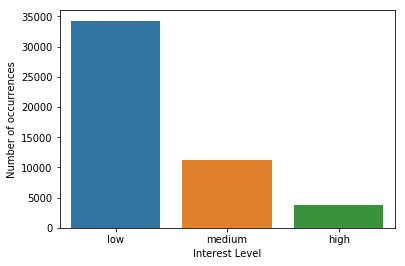

In [7]:
#该问题为分类问题，类别型特征直方图可用countplot
sns.countplot(train.interest_level, order=['low', 'medium', 'high']);
plt.xlabel('Interest Level');
plt.ylabel('Number of occurrences');

In [8]:
### Quantitative substitute of Interest Level
# 用有序数字编码：0:low；1:medium；2:high
train['interest'] = np.where(train.interest_level=='low', 0,
                                  np.where(train.interest_level=='medium', 1, 2))

大多数样本都是interest level为low，然后是medium，最后是high。
此处不用LableEncoder，因为LableEncoder不能手动指定每个标签对应的数值。
也可以使用另一种转换方式：
target_num_map = {'high':2, 'medium':1, 'low':0}  
y = train["interest_level"].apply(lambda x: target_num_map[x])  

然后来看看数值型特征：
bathrooms，
bedrooms，
price

bathrooms 和bedrooms特征的取值集合较小，可视为类别型特征，哦那个seaborn.countplot画分布图
price可能的取值多，用seaborn.distplott画分布图

### Bathrooms

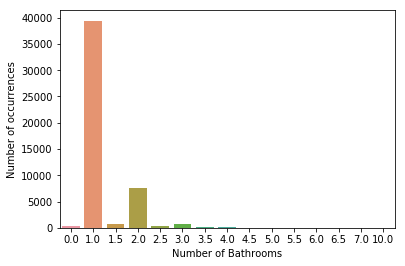

In [9]:
fig = plt.figure()
### Number of occurrences
sns.countplot(train.bathrooms);
plt.xlabel('Number of Bathrooms');
plt.ylabel('Number of occurrences');


顺便查看bathrooms与标签之间的关系
不同interest_level下的bathrooms散点图：stripplot
散点图有时会重叠，所以打点时有某种随机的jitter

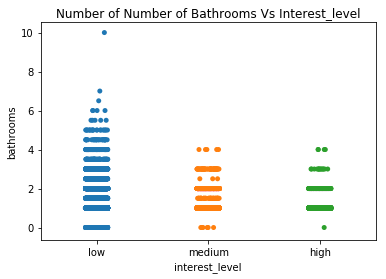

In [10]:
order = ['low', 'medium', 'high']
sns.stripplot(train["interest_level"],train["bathrooms"],jitter=True,order=order)
plt.title("Number of Number of Bathrooms Vs Interest_level");

There is 1 house listing with 10 bathrooms. I think we can treat that as outlier. Lets remove it and plot again.

从直方图也可以看出超过4个bathroom的房子很少

In [11]:
#ulimit = np.percentile(train.bathrooms.values, 99.5)
ulimit = 10
#train['bathrooms'].ix[train['bathrooms']>ulimit] = ulimit

# 删除y大于40的样本
train = train[train['bathrooms'] < ulimit]

In [12]:
train.shape

(49351, 16)

删除了一个样本

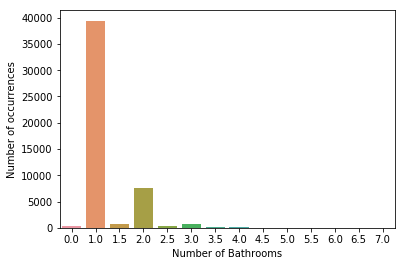

In [13]:
fig = plt.figure()
### Number of occurrences
sns.countplot(train.bathrooms);
plt.xlabel('Number of Bathrooms');
plt.ylabel('Number of occurrences');

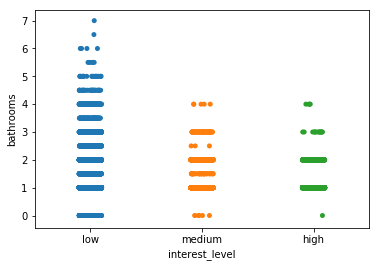

In [14]:
sns.stripplot(y="bathrooms", x="interest_level",data=train,jitter=True,order=order);

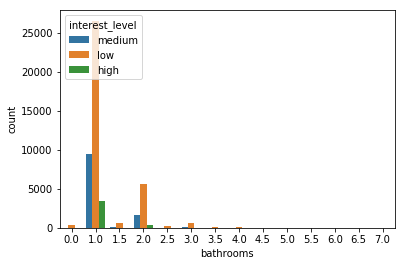

In [15]:
sns.countplot(x="bathrooms", hue="interest_level",data=train);

没有bathroom的房子极少high interest

### Bedrooms

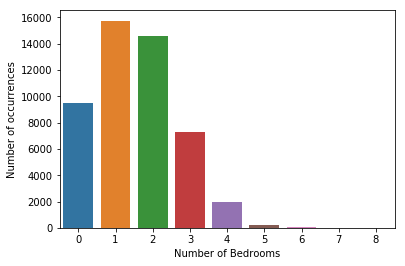

In [16]:
fig = plt.figure()
### Number of occurrences
sns.countplot(train.bedrooms);
plt.xlabel('Number of Bedrooms');
plt.ylabel('Number of occurrences');


查看bedrooms与标签之间的关系

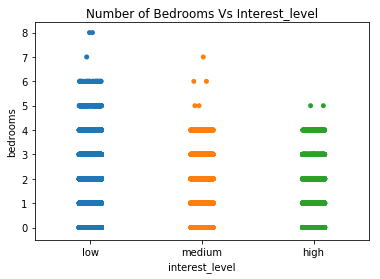

In [17]:
order = ['low', 'medium', 'high']
sns.stripplot(train["interest_level"],train["bedrooms"],jitter=True,order=order)
plt.title("Number of Bedrooms Vs Interest_level");

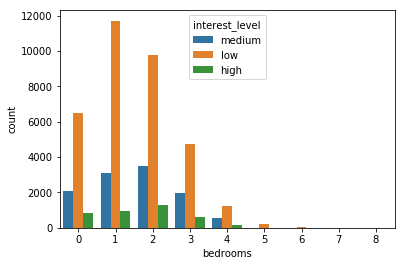

In [18]:
sns.countplot(x="bedrooms", hue="interest_level",data=train);

### Price

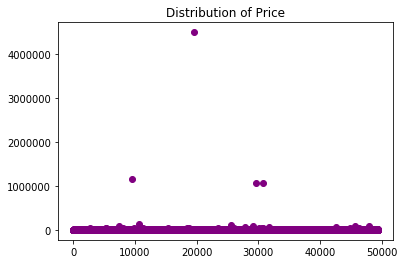

In [19]:
plt.scatter(range(train.shape[0]), train["price"].values,color='purple')
plt.title("Distribution of Price");

Looks like there are some outliers in this feature. So let us remove them and then plot again.

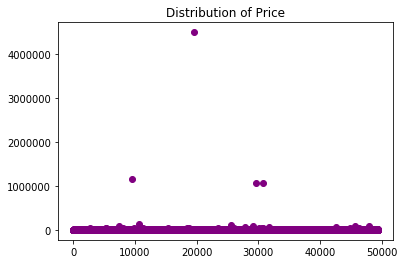

In [20]:
plt.scatter(range(train.shape[0]), train["price"].values,color='purple')
plt.title("Distribution of Price");

/Users/qing/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


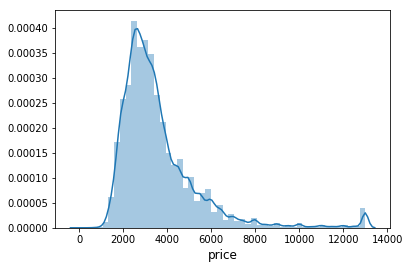

In [21]:
ulimit = np.percentile(train.price.values, 99)
train['price'].ix[train['price']>ulimit] = ulimit

sns.distplot(train.price.values, bins=50, kde=True)
plt.xlabel('price', fontsize=12)
plt.show()

可以看出，该分布为right skewed。

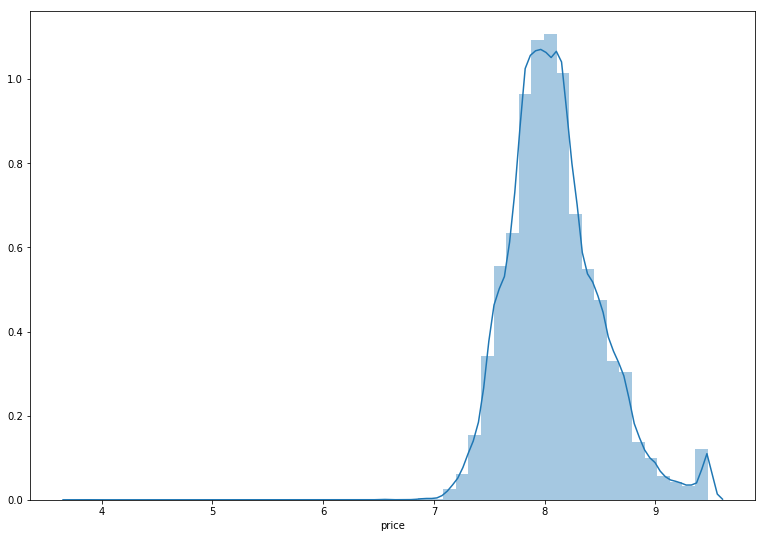

In [22]:
plt.figure(figsize=(13,9))
sns.distplot(np.log1p(train["price"]))

查看price与标签之间的关系

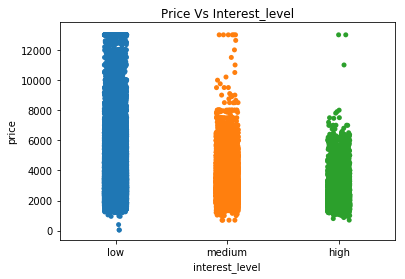

In [23]:
order = ['low', 'medium', 'high']
sns.stripplot(train["interest_level"],train["price"],jitter=True,order=order)
plt.title("Price Vs Interest_level");

low interest的price看起来均匀分布，medium和high的price更多在1500-8000之间

violinplot提供在不同类别条件下特征更多的分布信息：
核密度估计（KDE）
三个四分位数quartile（1/4，1/2， 3/4）
1.5倍四分位间距(nterquartile range，IQR)：
IQR：第三四分位数和第一四分位数的区别（即Q1~Q3 的差距），表示变量分散情形，比方差更稳健的统计量

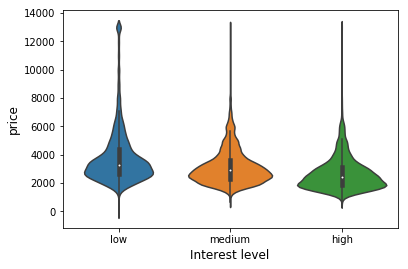

In [24]:
order = ['low', 'medium', 'high']
sns.violinplot(x='interest_level', y='price', data=train, order = order)
plt.xlabel('Interest level', fontsize=12)
plt.ylabel('price', fontsize=12)
plt.show()

### listing_id

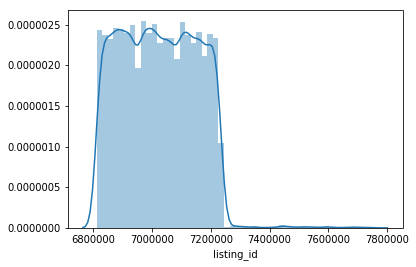

In [25]:
sns.distplot(train.listing_id.values, bins=50, kde=True)
plt.xlabel('listing_id')
plt.show()

listing_id与标签之间的关系

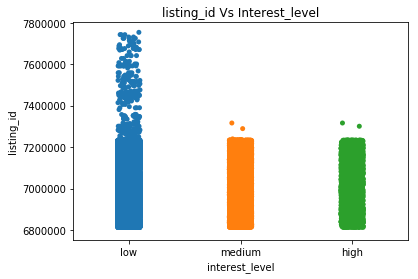

In [26]:
order = ['low', 'medium', 'high']
sns.stripplot(train["interest_level"],train["listing_id"],jitter=True,order=order)
plt.title("listing_id Vs Interest_level");

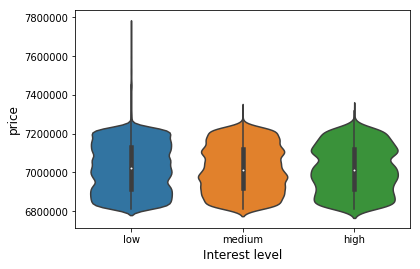

In [27]:
order = ['low', 'medium', 'high']
sns.violinplot(x='interest_level', y='listing_id', data=train, order = order)
plt.xlabel('Interest level', fontsize=12)
plt.ylabel('price', fontsize=12)
plt.show()

### 地理位置：Latitude & Longitude
Latitude & Longitude虽然是数值型变量，但其物理含义是房屋的地理位置。

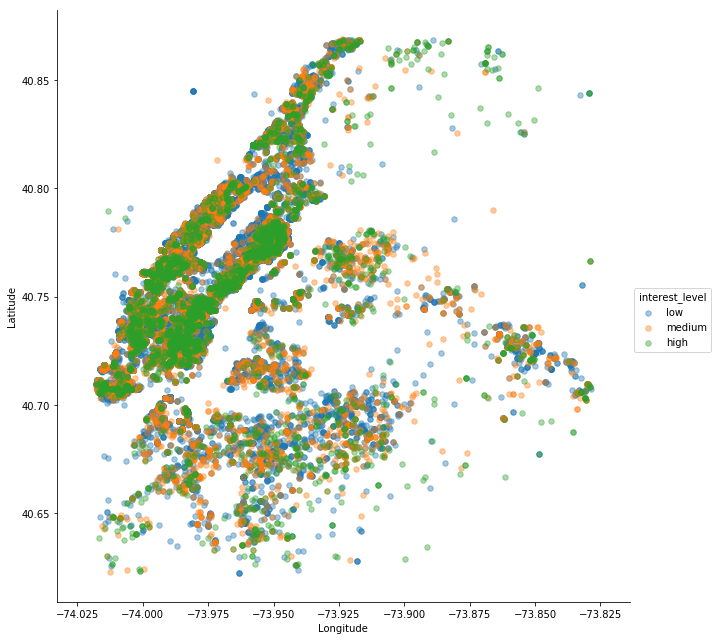

In [28]:
sns.lmplot(x="longitude", y="latitude", fit_reg=False, hue='interest_level',
           hue_order=['low', 'medium', 'high'], size=9, scatter_kws={'alpha':0.4,'s':30},
           data=train[(train.longitude>train.longitude.quantile(0.005))
                           &(train.longitude<train.longitude.quantile(0.995))
                           &(train.latitude>train.latitude.quantile(0.005))                           
                           &(train.latitude<train.latitude.quantile(0.995))]);
plt.xlabel('Longitude');
plt.ylabel('Latitude');

上述显示去掉了经度和纬度偏大或偏小的数据点。可以看出high interet的房屋在一小段很集中。可以load google earth 进一步看看其具体位置。
下面两段代码都是现实地图，可任选一段试试。不过需要先安装相应的工具包。

from mpl_toolkits.basemap import Basemap
from matplotlib import cm

west, south, east, north = -74.02, 40.64, -73.85, 40.86

fig = plt.figure(figsize=(14,10))
ax = fig.add_subplot(111)
m = Basemap(projection='merc', llcrnrlat=south, urcrnrlat=north,
            llcrnrlon=west, urcrnrlon=east, lat_ts=south, resolution='i')
x, y = m(train['longitude'].values, train['latitude'].values)
m.hexbin(x, y, gridsize=200,
         bins='log', cmap=cm.YlOrRd_r);

import gpxpy as gpx
import gpxpy.gpx

gpx = gpxpy.gpx.GPX()

for index, row in train.iterrows():
    #print (row['latitude'], row['longitude'])

    if row['interest_level'] == 'high': #opting for all nominals results in poor performance of Google Earth
        gps_waypoint = gpxpy.gpx.GPXWaypoint(row['latitude'],row['longitude'],elevation=10)
        gpx.waypoints.append(gps_waypoint)
        
filename = "GoogleEarth.gpx"
FILE = open(filename,"w")
FILE.writelines(gpx.to_xml())
FILE.close()

### display_address

Display_address that appear less than 2 times: 63.22%
Display_address that appear less than 10 times: 89.6%
Display_address that appear less than 50 times: 97.73%
Display_address that appear less than 100 times: 99.26%
Display_address that appear less than 500 times: 100.0%


Text(0,0.5,u'log(Count)')

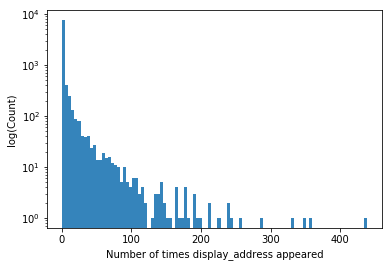

In [29]:
cnt_srs = train.groupby('display_address')['display_address'].count()

for i in [2, 10, 50, 100, 500]:
    print('Display_address that appear less than {} times: {}%'.format(i, round((cnt_srs < i).mean() * 100, 2)))

plt.figure()
plt.hist(cnt_srs.values, bins=100, log=True, alpha=0.9)
#sns.distplot(cnt_srs.values, bins=100)
plt.xlabel('Number of times display_address appeared')
plt.ylabel('log(Count)')


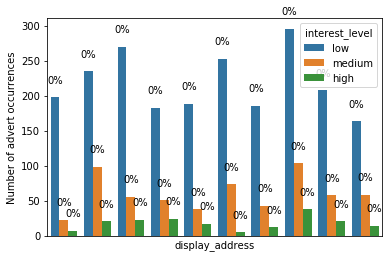

In [30]:
### Let's get a list of top 10 display address
top10da = train.display_address.value_counts().nlargest(10).index.tolist()

fig = plt.figure()
ax = sns.countplot(x="display_address", hue="interest_level",
                   data=train[train.display_address.isin(top10da)]);
plt.xlabel('display_address');
plt.ylabel('Number of advert occurrences');
### Manager_ids are too long. Let's remove them
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom='off',      # ticks along the bottom edge are off
    top='off',         # ticks along the top edge are off
    labelbottom='off');

### Adding percents over bars
height = [0 if np.isnan(p.get_height()) else p.get_height() for p in ax.patches]
ncol = int(len(height)/3)
total = [height[i] + height[i + ncol] + height[i + 2*ncol] for i in range(ncol)] * 3
for i, p in enumerate(ax.patches):    
    ax.text(p.get_x()+p.get_width()/2,
            height[i] + 20,
            '{:1.0%}'.format(height[i]/total[i]),
            ha="center")

### building_id

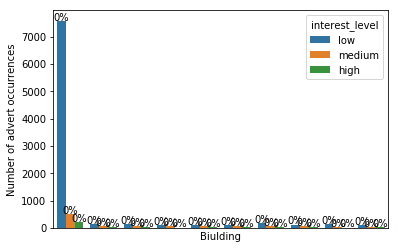

In [31]:
### Let's get a list of top 10 building id
top10building = train.building_id.value_counts().nlargest(10).index.tolist()
### ...and plot number of different Interest Level rental adverts for each of them
fig = plt.figure()
ax = sns.countplot(x="building_id", hue="interest_level",
                   data=train[train.building_id.isin(top10building)]);
plt.xlabel('Biulding');
plt.ylabel('Number of advert occurrences');
### building_id are too long. Let's remove them
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom='off',      # ticks along the bottom edge are off
    top='off',         # ticks along the top edge are off
    labelbottom='off');

### Adding percents over bars
height = [0 if np.isnan(p.get_height()) else p.get_height() for p in ax.patches]
ncol = int(len(height)/3)
total = [height[i] + height[i + ncol] + height[i + 2*ncol] for i in range(ncol)] * 3
for i, p in enumerate(ax.patches):    
    ax.text(p.get_x()+p.get_width()/2,
            height[i] + 20,
            '{:1.0%}'.format(height[i]/total[i]),
            ha="center")

### manager_id
处理方法类似building_id

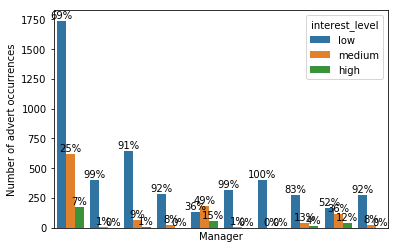

In [32]:
### Let's get a list of top 10 managers
top10managers = train.manager_id.value_counts().nlargest(10).index.tolist()
### ...and plot number of different Interest Level rental adverts for each of them
fig = plt.figure()
ax = sns.countplot(x="manager_id", hue="interest_level",
                   data=train[train.manager_id.isin(top10managers)]);
plt.xlabel('Manager');
plt.ylabel('Number of advert occurrences');
### Manager_ids are too long. Let's remove them
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom='off',      # ticks along the bottom edge are off
    top='off',         # ticks along the top edge are off
    labelbottom='off');

### Adding percents over bars
height = [0 if np.isnan(p.get_height()) else p.get_height() for p in ax.patches]
ncol = int(len(height)/3)
total = [height[i] + height[i + ncol] + height[i + 2*ncol] for i in range(ncol)] * 3
for i, p in enumerate(ax.patches):    
    ax.text(p.get_x()+p.get_width()/2,
            height[i] + 20,
            '{:1.0%}'.format(height[i]/total[i]),
            ha="center")

### created date
日期型特征

In [33]:
train['created'] = pd.to_datetime(train['created'])
train['date'] = train['created'].dt.date
train["year"] = train["created"].dt.year
train['month'] = train['created'].dt.month
train['day'] = train['created'].dt.day
train['hour'] = train['created'].dt.hour
train['weekday'] = train['created'].dt.weekday
train['week'] = train['created'].dt.week
train['quarter'] = train['created'].dt.quarter
train['weekend'] = ((train['weekday'] == 5) & (train['weekday'] == 6))
train['wd'] = ((train['weekday'] != 5) & (train['weekday'] != 6))

#### created date --> date

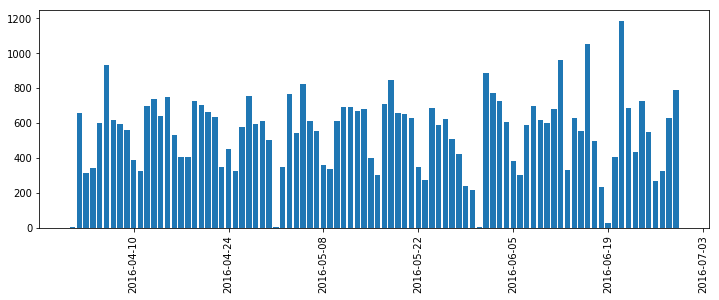

In [34]:
cnt_srs = train['date'].value_counts()

plt.figure(figsize=(12,4))
ax = plt.subplot(111)
ax.bar(cnt_srs.index, cnt_srs.values)
ax.xaxis_date()
plt.xticks(rotation='vertical')
plt.show()

All listings have been created in April to July 2016 period in our data.

#### hour

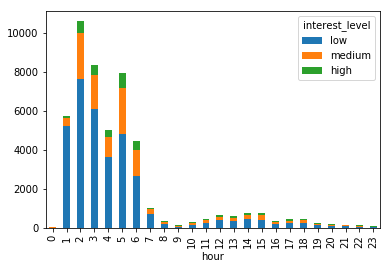

In [35]:
hourDF = train.groupby(['hour', 'interest_level'])['hour'].count().unstack('interest_level').fillna(0)
hourDF[['low','medium',"high"]].plot(kind='bar', stacked=True);

#### month

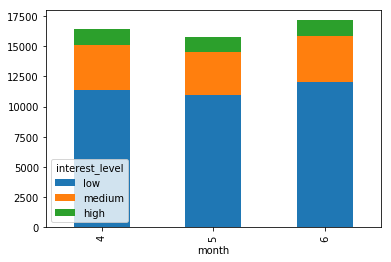

In [36]:
monthDF = train.groupby(['month', 'interest_level'])['month'].count().unstack('interest_level').fillna(0)
monthDF[['low','medium',"high"]].plot(kind='bar', stacked=True);

### Photo Numbers

/Users/qing/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:3: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/qing/anaconda2/lib/python2.7/site-packages/pandas/core/indexing.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


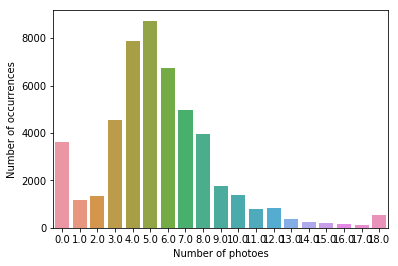

In [37]:
train['num_photos'] = train['photos'].apply(len)
ulimit = np.percentile(train.num_photos.values, 99)
train['num_photos'].ix[train['num_photos']>ulimit] = ulimit

sns.countplot(train.num_photos);
plt.xlabel('Number of photoes');
plt.ylabel('Number of occurrences');

/Users/qing/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


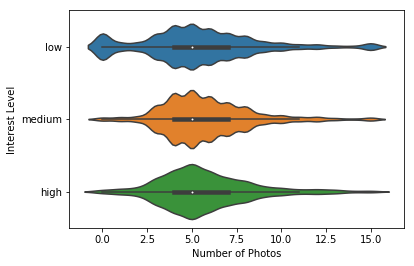

In [38]:
train['num_photos'].ix[train['num_photos']>15] = 15
#sns.stripplot(y="num_photos", x="interest_level",data=train,jitter=True,order=order);

plt.figure()
sns.violinplot(x="num_photos", y="interest_level", data=train, order =['low','medium','high'])
plt.xlabel('Number of Photos')
plt.ylabel('Interest Level')
plt.show()

### Features Length

In [39]:
train['len_features'] = train['features'].apply(len)


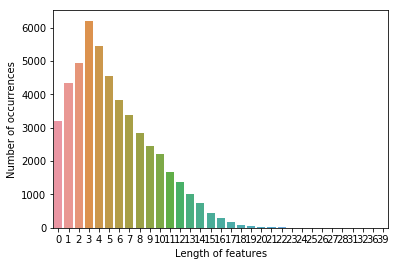

In [40]:
sns.countplot(train.len_features);
plt.xlabel('Length of features');
plt.ylabel('Number of occurrences');

/Users/qing/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


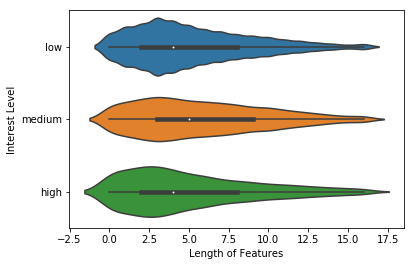

In [41]:
train['len_features'].ix[train['len_features'] > 16] = 16

plt.figure()
sns.violinplot(x="len_features", y="interest_level", data=train, order =['low','medium','high'])
plt.xlabel('Length of Features')
plt.ylabel('Interest Level')
plt.show()

### desctiprion words counts

In [42]:
train['num_description_words'] = train['description'].apply(lambda x: len(x.split(' ')))
train['len_description'] = train['description'].apply(len)

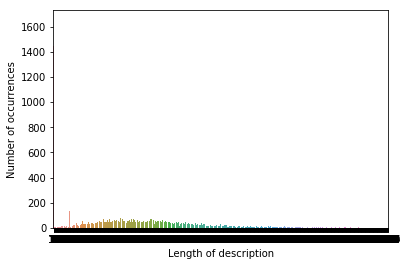

In [43]:
#ulimit = np.percentile(train.len_description.values, 99)
#train['len_description'].ix[train['len_description']>ulimit] = ulimit

sns.countplot(train.len_description);
plt.xlabel('Length of description');
plt.ylabel('Number of occurrences');

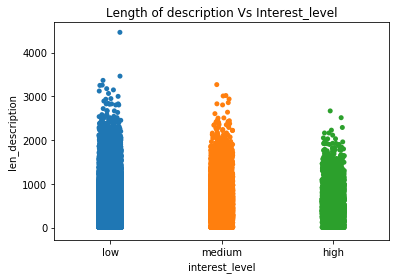

In [44]:
fig = plt.figure()
order = ['low', 'medium', 'high']
#ulimit = np.percentile(train.len_description.values, 99)
#train['len_description'].ix[train['len_description']>ulimit] = ulimit

sns.stripplot(train["interest_level"],train["len_description"],jitter=True,order=order)
plt.title("Length of description Vs Interest_level");


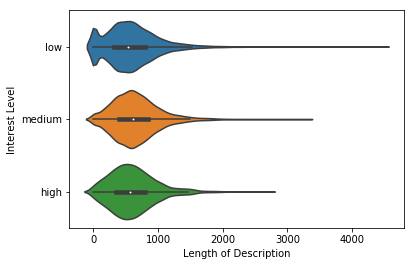

In [45]:
plt.figure()
sns.violinplot(x="len_description", y="interest_level", data=train, order =['low','medium','high'])
plt.xlabel('Length of Description')
plt.ylabel('Interest Level')
plt.show()

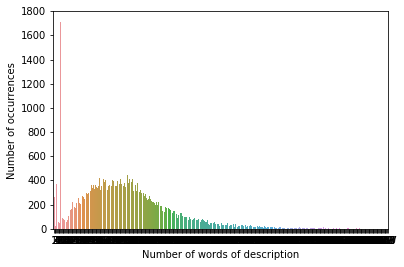

In [46]:
sns.countplot(train.num_description_words);
plt.xlabel('Number of words of description');
plt.ylabel('Number of occurrences');

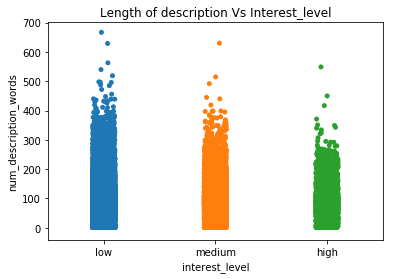

In [47]:
fig = plt.figure()
order = ['low', 'medium', 'high']
#ulimit = np.percentile(train.num_description_words.values, 99)
#ulimit = 500
#train['num_description_words'].ix[train['num_description_words']>ulimit] = ulimit
sns.stripplot(train["interest_level"],train["num_description_words"],jitter=True,order=order)
plt.title("Length of description Vs Interest_level");

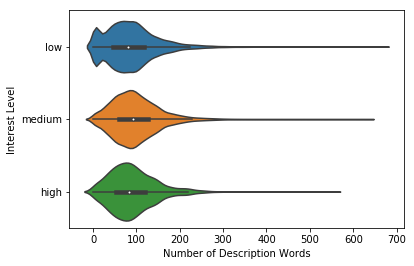

In [48]:
plt.figure()
sns.violinplot(x="num_description_words", y="interest_level", data=train, order =['low','medium','high'])
plt.xlabel('Number of Description Words')
plt.ylabel('Interest Level')
plt.show()

#### 词云(display_address, street_address, features)

WordCloud官网: https://amueller.github.io/word_cloud/ 
github: https://github.com/amueller/word_cloud 

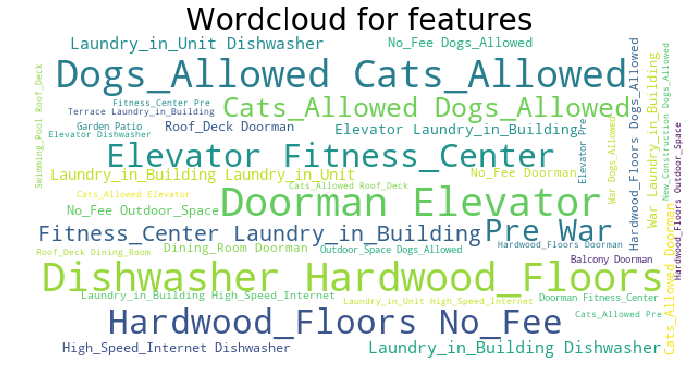

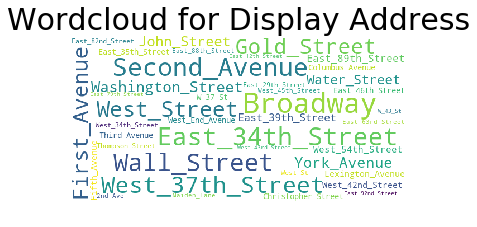

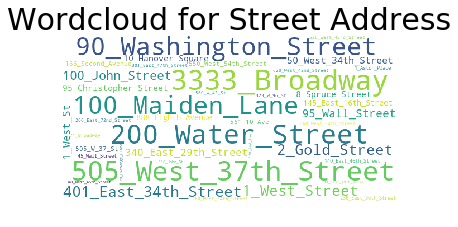

In [49]:
from wordcloud import WordCloud

text = ''
text_da = ''
text_street = ''
#text_desc = ''
for ind, row in train.iterrows():
    for feature in row['features']:
        text = " ".join([text, "_".join(feature.strip().split(" "))])
    text_da = " ".join([text_da,"_".join(row['display_address'].strip().split(" "))])
    text_street = " ".join([text_street,"_".join(row['street_address'].strip().split(" "))])
    #text_desc = " ".join([text_desc, row['description']])
text = text.strip()
text_da = text_da.strip()
text_street = text_street.strip()
#text_desc = text_desc.strip()

plt.figure(figsize=(12,6))
wordcloud = WordCloud(background_color='white', width=600, height=300, max_font_size=50, max_words=40).generate(text)
wordcloud.recolor(random_state=0)
plt.imshow(wordcloud)
plt.title("Wordcloud for features", fontsize=30)
plt.axis("off")
plt.show()

# wordcloud for display address
plt.figure()
wordcloud = WordCloud(background_color='white', width=600, height=300, max_font_size=50, max_words=40).generate(text_da)
wordcloud.recolor(random_state=0)
plt.imshow(wordcloud)
plt.title("Wordcloud for Display Address", fontsize=30)
plt.axis("off")
plt.show()

# wordcloud for street address
plt.figure()
wordcloud = WordCloud(background_color='white', width=600, height=300, max_font_size=50, max_words=40).generate(text_street)
wordcloud.recolor(random_state=0)
plt.imshow(wordcloud)
plt.title("Wordcloud for Street Address", fontsize=30)
plt.axis("off")
plt.show()

## 特征之间的相关性

In [50]:
contFeatureslist = []
contFeatureslist.append("bathrooms")
contFeatureslist.append("bedrooms")
contFeatureslist.append("price")

print(contFeatureslist)

['bathrooms', 'bedrooms', 'price']


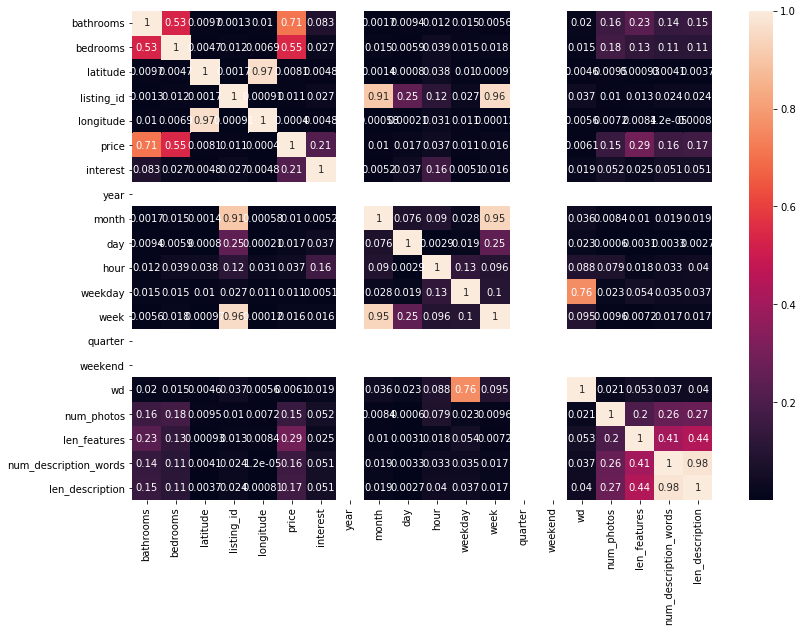

In [54]:
data_corr = train.corr().abs()

plt.subplots(figsize=(13, 9))
sns.heatmap(data_corr,annot=True)

# Mask unimportant features
sns.heatmap(data_corr, mask=correlationMatrix < 1, cbar=False)
plt.show()

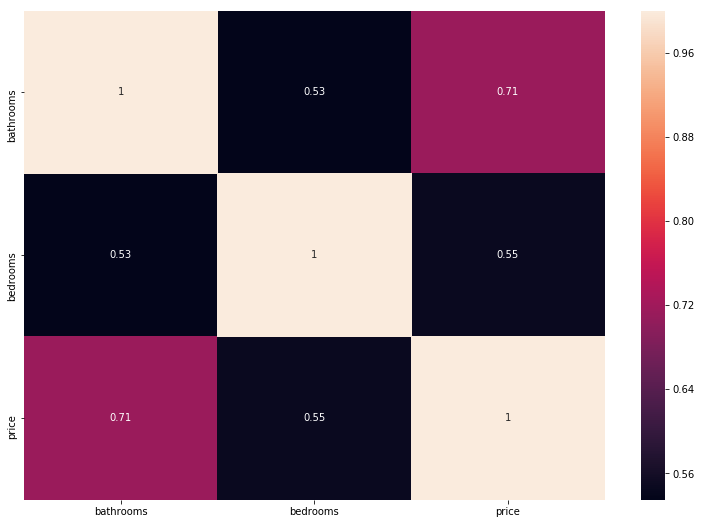

In [52]:
correlationMatrix = train[contFeatureslist].corr().abs()

plt.subplots(figsize=(13, 9))
sns.heatmap(correlationMatrix,annot=True)

# Mask unimportant features
sns.heatmap(correlationMatrix, mask=correlationMatrix < 1, cbar=False)
plt.show()